### Getting MNIST data

In [1]:
from keras.datasets import mnist

(all_train_images, all_train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
all_train_images.shape

(60000, 28, 28)

In [3]:
all_train_labels.shape

(60000,)

In [4]:
all_train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Normalizing

In [8]:
all_train_images = all_train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Splitting train dataset into a train and validation sets

In [9]:
train_images = all_train_images[:50000, :, :]
train_images.shape

(50000, 28, 28)

In [10]:
validation_images = all_train_images[50000:, :, :]
validation_images.shape

(10000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels = all_train_labels[:50000]
train_labels.shape

(50000,)

In [13]:
validation_labels = all_train_labels[50000:]
validation_labels.shape

(10000,)

In [14]:
test_labels.shape

(10000,)

### Reshaping for Dense input 

In [15]:
train_images_mlp = train_images.reshape((50000, 28 * 28))
validation_images_mlp = validation_images.reshape((10000, 28 * 28))
test_images_mlp = test_images.reshape((10000, 28 * 28))

print(train_images_mlp.shape)
print(validation_images_mlp.shape)
print(test_images_mlp.shape)

(50000, 784)
(10000, 784)
(10000, 784)


### One-hot encoding of labels

In [16]:
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
validation_labels_one_hot = to_categorical(validation_labels)
test_labels_one_hot = to_categorical(test_labels)

print("train_labels_one_hot.shape:", train_labels_one_hot.shape)
print("validation_labels_one_hot.shape:", validation_labels_one_hot.shape)
print("test_lanels_one_hot:", test_labels_one_hot.shape)

('train_labels_one_hot.shape:', (50000, 10))
('validation_labels_one_hot.shape:', (10000, 10))
('test_lanels_one_hot:', (10000, 10))


## MLP model

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s - loss: 0.2829 - acc: 0.9191 - val_loss: 0.1518 - val_acc: 0.9591
Epoch 2/5
50000/50000 [==============================] - 0s - loss: 0.1180 - acc: 0.9653 - val_loss: 0.1055 - val_acc: 0.9705
Epoch 3/5
50000/50000 [==============================] - 0s - loss: 0.0770 - acc: 0.9771 - val_loss: 0.0868 - val_acc: 0.9738
Epoch 4/5
50000/50000 [==============================] - 0s - loss: 0.0556 - acc: 0.9835 - val_loss: 0.0825 - val_acc: 0.9749
Epoch 5/5
50000/50000 [==============================] - 0s - loss: 0.0411 - acc: 0.9881 - val_loss: 0.0786 - val_acc: 0.9771
['acc', 'loss', 'val_acc', 'val_loss']


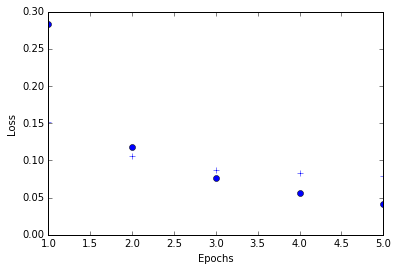

In [17]:
from keras.models import Model
from keras.layers import Input, Dense

inputs = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(hidden1)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_mlp = model.fit(train_images_mlp,
                        train_labels_one_hot,
                        epochs=5,
                        batch_size=128,
                        validation_data=(validation_images_mlp, validation_labels_one_hot))

history_dict = history_mlp.history
print(history_dict.keys())

%matplotlib inline
import matplotlib.pyplot as plt

loss_mlp = history_dict['loss']
val_loss_mlp = history_dict['val_loss']
epochs = range(1, len(loss_mlp) + 1)

plt.plot(epochs, loss_mlp, 'bo')
plt.plot(epochs, val_loss_mlp, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
test_loss_mlp, test_acc_mlp = model.evaluate(test_images_mlp, test_labels_one_hot)
print("test_loss_mlp:", test_loss_mlp)
print("test_acc_mlp:", test_acc_mlp)

 8544/10000 [========================>.....] - ETA: 0s('test_loss_mlp:', 0.070015156087907968)
('test_acc_mlp:', 0.97860000000000003)


### Reshape for Convolution input with one channel

In [19]:
train_images_chan = train_images.reshape((50000, 28, 28, 1))
validation_images_chan = validation_images.reshape((10000, 28, 28, 1))
test_images_chan = test_images.reshape((10000, 28, 28, 1))

print(train_images_chan.shape)
print(validation_images_chan.shape)
print(test_images_chan.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


## ConvNet model

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s - loss: 0.2153 - acc: 0.9322 - val_loss: 0.0579 - val_acc: 0.9831
Epoch 2/5
50000/50000 [==============================] - 3s - loss: 0.0513 - acc: 0.9836 - val_loss: 0.0567 - val_acc: 0.9815
Epoch 3/5
50000/50000 [==============================] - 3s - loss: 0.0339 - acc: 0.9889 - val_loss: 0.0595 - val_acc: 0.9837
Epoch 4/5
50000/50000 [==============================] - 3s - loss: 0.0251 - acc: 0.9923 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 5/5
50000/50000 [==============================] - 3s - loss: 0.0200 - acc: 0.9938 - val_loss: 0.0371 - val_acc: 0.9908


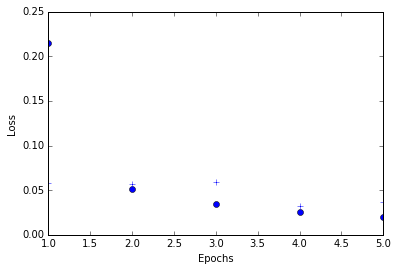

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(pool2)
flatten = Flatten()(conv3) # flattens to 576 units
dense1 = Dense(576, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(dense1)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_conv = model.fit(train_images_chan,
                         train_labels_one_hot,
                         epochs=5,
                         batch_size=128,
                         validation_data=(validation_images_chan, validation_labels_one_hot))

history_dict = history_conv.history

loss_conv = history_dict['loss']
val_loss_conv = history_dict['val_loss']
epochs = range(1, len(loss_conv) + 1)
plt.plot(epochs, loss_conv, 'bo')
plt.plot(epochs, val_loss_conv, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
test_loss_conv, test_acc_conv = model.evaluate(test_images_chan, test_labels_one_hot)
print("test_loss_conv:", test_loss_conv)
print("test_acc_conv:", test_acc_conv)

 9632/10000 [===========================>..] - ETA: 0s('test_loss_conv:', 0.030114142623929366)
('test_acc_conv:', 0.99170000000000003)


In [22]:

print("test_acc_mlp vs test_acc_conv:", test_acc_mlp, "vs", test_acc_conv)

('test_acc_mlp vs test_acc_conv:', 0.97860000000000003, 'vs', 0.99170000000000003)
